## Mixed Models - ARMA(p,q)

$X_t = Noise + Auto\_Regressive\ part + Moving\_Average\ part$

ie,

$X_t = Z_t + \phi_1X_{t-1}+\phi_2X_{t-2}+...+\phi_pX_{t-p}+\theta_1Z_{t-1}+\theta_2Z_{t-2}+...+\theta_qZ_{t-q}$

* In terms of backward operator, above equation can be rewritten as,

$X_t = Z_t + \phi_1X_tB+\phi_2X_tB^2+...+\phi_pX_tB^p+\theta_1Z_tB+\theta_2Z_tB^2+...+\theta_qZ_tB^q $

* From above equation (only the AR part), noise can be rewritten as

$Z_t = X_t(1-\phi_1B-\phi_2B^2-...-\phi_pB^p)$

$Z_t = X_t\phi(B)$ 

where,

$\phi(B)=1-\phi_1B-\phi_2B^2-...-\phi_pB^p$

Similarly moving backward difference of average part can also be written as

<img src ="ARMA_backward_difference_operator.PNG">

Now based on above expressions, we can rewrite ARMA expression as,

$\phi(B)X_t=\theta(B)Z_t$

$X_t = \frac{\theta(B)}{\phi(B)}Z_t$

But how do we handle, $\psi = \frac{\theta(B)}{\phi(B)}$

<img src ="ARMA_as_infinite_sum_of_ma_process.PNG">

# Thus we expressed ARMA model as infinite sum of MA process

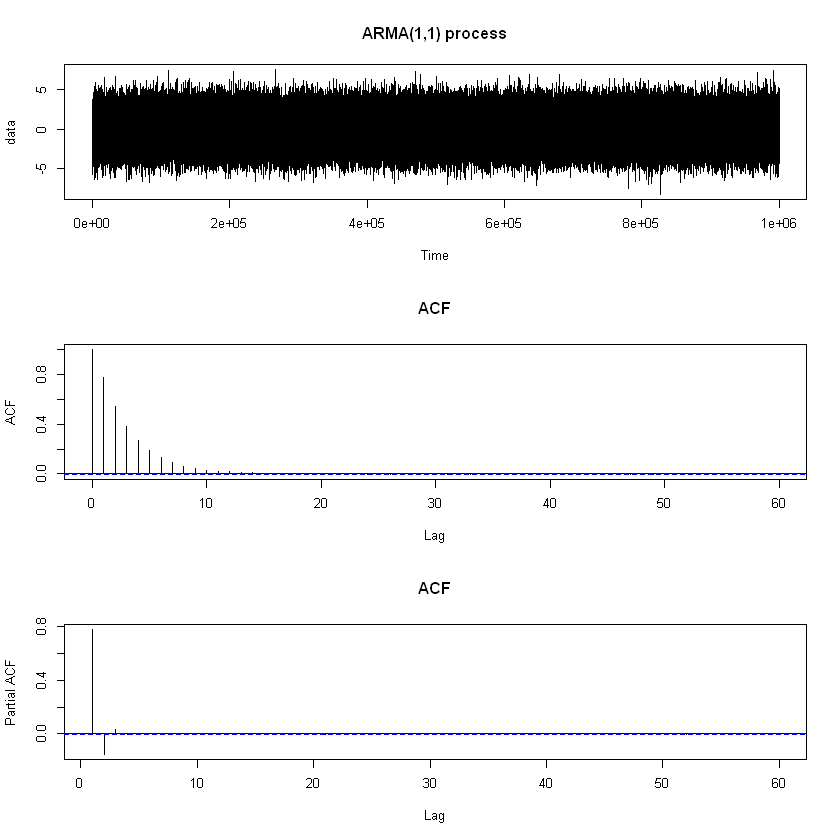

In [1]:
#Let's try to simulate following ARMA process
#X_t = Z_t+.7*X_{t-1}++.2*Z_{t-1}

set.seed(500)
data <- arima.sim(list(order=c(1,0,1),ar=.7,ma=.2),n=1000000)

par(mfrow=c(3,1))
plot(data,main='ARMA(1,1) process')
acf(data,main='ACF')
acf(data,type='partial',main='ACF')

In [8]:
#install.packages('forecast')
library('forecast')
m <- auto.arima(data,max.p = 3,max.q=3)

In [9]:
Box.test(resid(m),type=c('Ljung-Box'))


	Box-Ljung test

data:  resid(m)
X-squared = 8.7364e-05, df = 1, p-value = 0.9925


In [10]:
m

Series: data 
ARIMA(1,0,1) with zero mean     

Coefficients:
         ar1     ma1
      0.6996  0.2008
s.e.  0.0009  0.0012

sigma^2 estimated as 1:  log likelihood=-1418944
AIC=2837893   AICc=2837893   BIC=2837929